# Analysis #2: Analyzing oskar distribution across sequence collection
- Author: Savandara BESSE & Leo BLONDEL
- Creation: 05-05-2017
- Last modification: 11-01-2019

### Required inputs
- ../Data/01_Oskar_identification/oskar_tracker_results/search_results.csv

### Description
Generates plots shown in Figure S2.


In [1]:
import json, math, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set()
%matplotlib inline

## Step 1 : Load CSV file

In [2]:
search_metadata = pd.read_csv('../Data/01_Oskar_identification/oskar_tracker_results/search_results.csv')

In [3]:
search_metadata[search_metadata['filtered_hits'] > 0].groupby('source').sum()['filtered_hits']

source
GCA     96.0
GCF     78.0
TSA    238.0
Name: filtered_hits, dtype: float64

## Results
### 1. Number of Oskar found per type of data

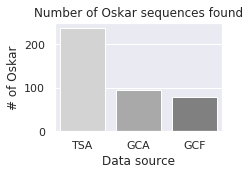

In [5]:
data = search_metadata[search_metadata['filtered_hits'] > 0].groupby('source', as_index=False).sum()

fig = plt.figure(figsize=(3,2))

sns.barplot(data=data, y='filtered_hits', x='source', order=['TSA', 'GCA', 'GCF'], palette=['lightgrey', 'darkgray', 'grey'])
plt.ylabel('# of Oskar')
plt.xlabel('Data source')
plt.title("Number of Oskar sequences found")

fig.savefig('../Figures/RAW/FigS2_nb_oskar.svg', format='svg')


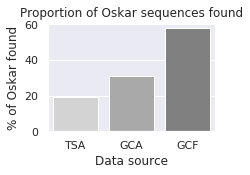

In [6]:
data = search_metadata[search_metadata['filtered_hits'] > 0].groupby('source', as_index=False).sum()
data['prop'] = 100 * search_metadata[search_metadata['filtered_hits'] > 0].groupby('source', as_index=False).count()['filtered_hits'] / search_metadata.groupby('source', as_index=False).count()['hits']

fig = plt.figure(figsize=(3,2))

sns.barplot(data=data, y='prop', x='source', order=['TSA', 'GCA', 'GCF'], palette=['lightgrey', 'darkgray', 'grey'])
plt.ylabel('% of Oskar found')
plt.xlabel('Data source')
plt.title("Proportion of Oskar sequences found")


fig.savefig('../Figures/RAW/FigS2_prop_oskar.svg', format='svg')


In [7]:
search_metadata[search_metadata['order_name'] == 'Lepidoptera'].groupby('source').count()

,index,id,species,family_name,order_name,hits,filtered_hits
source,,,,,,,
GCA,80,80,80,80,80,80,80
GCF,17,17,17,17,17,17,17
TSA,135,135,135,135,135,135,135


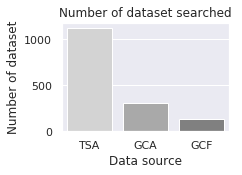

In [8]:
data = search_metadata.groupby('source', as_index=False).count()

fig = plt.figure(figsize=(3,2))

sns.barplot(data=data, y='hits', x='source', order=['TSA', 'GCA', 'GCF'], palette=['lightgrey', 'darkgray', 'grey'])
plt.ylabel('Number of dataset')
plt.xlabel('Data source')
plt.title("Number of dataset searched")


fig.savefig('../Figures/RAW/FigS2_source_number.svg', format='svg')


### 2. Oskar distribution per order and data type

In [9]:
import colors

colormap = colors.colors()

In [10]:
### Insect evolution order
insect_evolution = ['Zygentoma',
'Ephemeroptera',
'Plecoptera',
'Orthoptera',
'Phasmatodea',
'Blattodea',
'Thysanoptera',
'Psocoptera',
'Hymenoptera',
'Neuroptera', 
'Coleoptera',
'Trichoptera',
'Lepidoptera',
'Mecoptera',
'Diptera']

colors = [colormap.order(i) for i in insect_evolution]

In [11]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                if not np.isnan(p.get_height()):
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height()
                    value = int(p.get_height())
                    ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                if not np.isnan(p.get_width()):
                    _x = p.get_x() + p.get_width() + float(space)
                    if p.get_height() > 0.5:
                        _y = p.get_y() + p.get_height() / 1.5
                    else:
                        _y = p.get_y() + p.get_height()
                    if p.get_width() > 0:
                        value = max(1, int(p.get_width()))
                    else:
                        value = ""
                    ax.text(_x, _y, value, ha="left")
                    
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

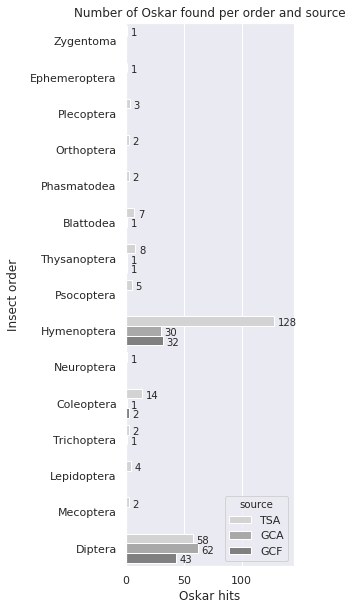

In [12]:
fig = plt.figure(figsize=(3, 10))
axs = sns.barplot(data=search_metadata, y='order_name', x='filtered_hits', ci=None, estimator=sum, hue='source', hue_order=['TSA', 'GCA', 'GCF'], order=insect_evolution, palette=['lightgrey', 'darkgray', 'grey'])    
plt.ylabel('Insect order', labelpad=10)
plt.xlabel('Oskar hits')
plt.title("Number of Oskar found per order and source")
show_values_on_bars(axs, 'h', 3)
plt.xlim(0,145)


fig.savefig('../Figures/RAW/FigS2_order_breakdown.svg', format='svg')

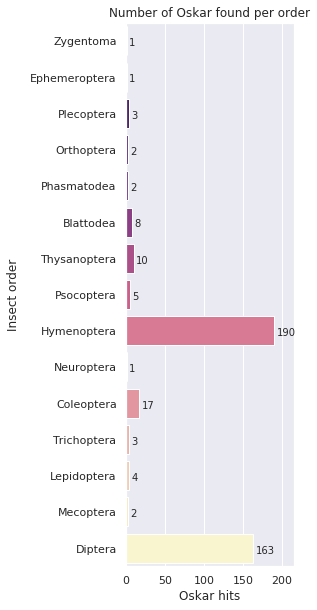

In [13]:
fig = plt.figure(figsize=(3, 10))

axs = sns.barplot(data=search_metadata, y='order_name', x='filtered_hits', ci=None, estimator=sum, order=insect_evolution, palette=colors)    
plt.ylabel('Insect order', labelpad=10)
plt.xlabel('Oskar hits')
plt.title("Number of Oskar found per order")
plt.xlim(0,215)
show_values_on_bars(axs, 'h', 3)

fig.savefig('../Figures/RAW/FigS2_order_counts.svg', format='svg')